In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Projects/tRANSPORT/Ashik Bhai/carsh_mod.csv")
df.head()

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,LATITUDE,...,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR,CRASH_SEVERITY
0,30,4,4,1,4,1,1,4,1,46.857044,...,19.0,M,Neither Present,Failed to Yield,35.0,47.0,M,35.0,18,3
1,30,4,4,1,4,2,3,7,1,46.825870,...,43.0,M,Yes (Alcohol),Fail Keep in Proper Lane,25.0,NaN,NaN,NaN,1,2
2,9,1,1,1,6,1,1,3,3,46.874448,...,32.0,M,Neither Present,Driving Left of Center,15.0,21.0,M,15.0,15,3
3,13,1,1,1,4,2,2,4,2,47.365116,...,49.0,M,Neither Present,Vision Obstructed,NaN,44.0,M,NaN,12,3
4,52,4,4,1,4,1,1,7,1,47.770518,...,32.0,F,Neither Present,Improper Backing/Turning,25.0,NaN,NaN,NaN,20,3


In [ ]:
# prompt: view the count of different categories in CRASH_SEVERITY column

df['CRASH_SEVERITY'].value_counts()

,count
CRASH_SEVERITY,
3,111351
5,15966
2,15220
4,3964
1,1114


In [ ]:
df = df[~df.eq("Unknown").any(axis=1)]


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(36538, 28)

In [ ]:
# prompt: fina no of nan in each column

df.isna().sum()

,0
COUNTY,0
LIGHT,0
WEATHER,0
ROAD_COND,0
SURFACE_COND,0
RELATION_TO_JUNCTI,0
INTER_TYPE,0
MANNER_OF_COLL,0
ROAD_GEOM,0
LATITUDE,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pandas as pd
import numpy as np


In [ ]:


for col in df.columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-" * 20)

Column: COUNTY
[30  8  9 50 45 18 47 51 36 27  6 53 52 28 21  7  2 31 23 29  5 37 34 32
 11 16 15 40 39 49 41 14 12  4 13 38 22  3 25 10 42 33  1 20 35 24 44 46
 19 17 26 48 43]
--------------------
Column: LIGHT
[1 4 5 2 3 0 6]
--------------------
Column: WEATHER
[1 2 4 0 5 3 6 8 7 9]
--------------------
Column: ROAD_COND
[1 2 5 4 9 8 6 7 3]
--------------------
Column: SURFACE_COND
[6 7 2 4 5 1 0 3 9]
--------------------
Column: RELATION_TO_JUNCTI
[ 2  8  1  3  5  4  6  7  9 10]
--------------------
Column: INTER_TYPE
[3 1 2 5 4 6 7]
--------------------
Column: MANNER_OF_COLL
[10  2  3  1  4  9  8  5 11  7  6]
--------------------
Column: ROAD_GEOM
[1 3 2 5 9 4]
--------------------
Column: LATITUDE
[46.8276   46.805305 46.81869  ... 48.183182 47.918404 46.412976]
--------------------
Column: LONGITUDE
[-100.880738 -100.778571  -96.861476 ...  -97.028734 -101.296061
  -97.74183 ]
--------------------
Column: CRASH_DAY
['Wednesday' 'Tuesday' 'Thursday' 'Friday' 'Saturday' 'Sunday'

In [ ]:
df_ungrouped = df.copy()

In [ ]:
df_ungrouped

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,LATITUDE,...,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR,CRASH_SEVERITY
5,30,1,1,1,6,2,3,10,1,46.827600,...,32.0,M,Neither Present,No Clear,25.0,50.0,M,25.0,14,2
8,8,1,2,1,7,2,3,10,1,46.805305,...,20.0,M,Neither Present,Ran Red Light,25.0,37.0,F,25.0,16,5
14,9,1,2,1,2,8,1,2,1,46.818690,...,26.0,F,Neither Present,Attn Distracted-Inside,40.0,26.0,F,40.0,14,3
21,8,1,1,1,6,1,1,2,1,46.794868,...,66.0,M,Neither Present,Following too Close,25.0,54.0,F,25.0,13,3
22,8,4,1,1,4,2,3,3,1,46.828108,...,25.0,F,Neither Present,Failed to Yield,25.0,54.0,F,25.0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147555,18,5,7,1,1,2,3,3,1,47.918404,...,21.0,M,Neither Present,Failed to Yield,25.0,36.0,M,25.0,19,3
147557,30,1,1,1,1,2,3,1,1,46.847240,...,25.0,F,Neither Present,No Clear,25.0,67.0,F,25.0,9,3
147570,51,1,1,1,2,8,1,1,1,48.221896,...,16.0,F,Neither Present,Failed to Yield,25.0,18.0,M,35.0,7,3
147573,8,4,1,1,1,2,3,1,1,46.800132,...,49.0,M,Neither Present,No Clear,25.0,31.0,F,25.0,18,3


## Grouping

In [ ]:
df = df_ungrouped.copy()

In [ ]:
# Define a dictionary for grouping
grouping = {
    'Distraction-Related': [
        'Attn Distracted-Inside', 'Attn Distracted-Outside', 'Attn Distracted-ECD', 'Attn Distracted-Other ED'
    ],
    'Speed-Related': [
        'To Fast for Conditions', 'Speed'
    ],
    'Right-of-Way Violations': [
        'Failed to Yield', 'Disregard Traffic Signs', 'Disregard Road Markings', 'Ran Red Light'
    ],
    'Improper Driving Maneuvers': [
        'Improper Turn', 'Improper Lane Change', 'Improper Backing/Turning',
        'Improper Evasive Action', 'Improper Overtaking'
    ],
    'Lane/Position Issues': [
        'Fail Keep in Proper Lane', 'Driving Left of Center', 'Wrong Way'
    ],
    'Environmental Factors': [
        'Weather', 'Animal in Roadway', 'Physical Obstruction', 'Vision Obstructed'
    ],
    'Equipment/Mechanical Issues': [
        'MV Mechanical Failure', 'Defective Equipment', 'TCD Not Working/Missing'
    ],
    'Reckless or Aggressive Driving': [
        'Careless/Reckless Driving', 'Following too Close', 'Over Correct/Steering'
    ]
}

# Create a reverse mapping to assign new groups to each value
reverse_mapping = {value: key for key, values in grouping.items() for value in values}

# Apply the mapping and replace the original column
df['CONTRIB_FACT_DESCR_D1'] = df['CONTRIB_FACT_DESCR_D1'].map(reverse_mapping).fillna('Other/Unknown Factors')


In [ ]:
df['CONTRIB_FACT_DESCR_D1'].value_counts()

,count
CONTRIB_FACT_DESCR_D1,
Right-of-Way Violations,10668
Other/Unknown Factors,10079
Reckless or Aggressive Driving,7972
Speed-Related,3281
Improper Driving Maneuvers,1833
Environmental Factors,1560
Lane/Position Issues,574
Distraction-Related,357
Equipment/Mechanical Issues,214


In [ ]:
# prompt: drop the rows that have Other/Unknown Factors in CONTRIB_FACT_DESCR_D1 column

# Continue from the provided code
df = df[df['CONTRIB_FACT_DESCR_D1'] != 'Other/Unknown Factors']
df['CONTRIB_FACT_DESCR_D1'].value_counts()


,count
CONTRIB_FACT_DESCR_D1,
Right-of-Way Violations,10668
Reckless or Aggressive Driving,7972
Speed-Related,3281
Improper Driving Maneuvers,1833
Environmental Factors,1560
Lane/Position Issues,574
Distraction-Related,357
Equipment/Mechanical Issues,214


In [ ]:
df.shape

(26459, 28)

In [ ]:
# # Define a dictionary for grouping with new numerical codes
# manner_grouping = {
#     1: [1, 8, 9, 10],  # Angle Collisions
#     2: [2, 6, 11],     # Rear-End Collisions
#     3: [4, 5],         # Sideswipe Collisions
#     4: [3],            # Head-On Collisions
#     5: [7]             # Non-Collision or Other
# }

# # Create a reverse mapping where original values map to new numerical codes
# manner_reverse_mapping = {value: group for group, values in manner_grouping.items() for value in values}

# # Apply the mapping and replace the original column
# df['MANNER_OF_COLL'] = df['MANNER_OF_COLL'].map(manner_reverse_mapping).fillna(5)


In [ ]:
# Define a dictionary for grouping WEATHER with new numerical codes
weather_grouping = {
    1: [1, 2],  # Clear/Normal Weather
    2: [3, 4, 6],  # Rain/Snow Conditions
    3: [5, 8, 9, 7],  # Wind-Related Weather
    5: [0]  # Unknown Weather
}

# Create a reverse mapping where original values map to new numerical codes
weather_reverse_mapping = {value: group for group, values in weather_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['WEATHER'] = df['WEATHER'].map(weather_reverse_mapping).fillna(5)



In [ ]:
# prompt: drop label = 5


# Drop rows where 'MANNER_OF_COLL' is equal to 5
df = df[df['WEATHER'] != 5]


In [ ]:
df['WEATHER'].value_counts()

,count
WEATHER,
1,23090
2,2686
3,591


In [ ]:
# Define a dictionary for grouping LIGHT with new numerical codes
light_grouping = {
    1: [1],  # Daylight Conditions
    2: [2, 3, 4],  # Low Light/Transition Conditions
    3: [5, 6],  # Dark Conditions without Lighting
    4: [0]  # Unknown Lighting
}

# Create a reverse mapping where original values map to new numerical codes
light_reverse_mapping = {value: group for group, values in light_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['LIGHT'] = df['LIGHT'].map(light_reverse_mapping).fillna(5)
df['LIGHT'].value_counts()



,count
LIGHT,
1,21033
2,4880
3,340
4,114


In [ ]:
df = df[df['LIGHT'] != 4]
df['LIGHT'].value_counts()

,count
LIGHT,
1,21033
2,4880
3,340


In [ ]:
df.shape

(26253, 28)

In [ ]:
# Define a dictionary for grouping ROAD_COND with new numerical codes
road_cond_grouping = {
    1: [1],  # Normal Condition
    2: [2, 6],  # Construction/Altered Road Conditions
    3: [4, 5],  # Obstructions/Hazards
    4: [3, 7, 8, 9]  # Surface Defects
}

# Create a reverse mapping where original values map to new numerical codes
road_cond_reverse_mapping = {value: group for group, values in road_cond_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['ROAD_COND'] = df['ROAD_COND'].map(road_cond_reverse_mapping).fillna(4)




In [ ]:
df['ROAD_COND'].value_counts()

,count
ROAD_COND,
1,25690
3,422
2,125
4,16


In [ ]:
# Define a dictionary for grouping SURFACE_COND with new numerical codes
surface_cond_grouping = {
    1: [1],  # Normal Surface Conditions
    2: [2, 3, 4, 5, 6, 7, 8, 9],  # Wet/Slippery Surfaces
}

# Create a reverse mapping where original values map to new numerical codes
surface_cond_reverse_mapping = {value: group for group, values in surface_cond_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['SURFACE_COND'] = df['SURFACE_COND'].map(surface_cond_reverse_mapping).fillna(5)



In [ ]:
df = df[df['SURFACE_COND'] != 5]
df['SURFACE_COND'].value_counts()

,count
SURFACE_COND,
1.0,15931
2.0,10314


In [ ]:
df.shape

(26245, 28)

In [ ]:
# Define a dictionary for grouping RELATION_TO_JUNCTI with new numerical codes
relation_to_junction_grouping = {
    1: [1],  # Non-Junction Areas
    2: [2, 8],  # Intersection-Related
    3: [3, 4, 6, 7, 5, 9, 10],  # Highway/Interchange Areas
}

# Create a reverse mapping where original values map to new numerical codes
relation_to_junction_reverse_mapping = {value: group for group, values in relation_to_junction_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['RELATION_TO_JUNCTI'] = df['RELATION_TO_JUNCTI'].map(relation_to_junction_reverse_mapping).fillna(4)



In [ ]:
df['RELATION_TO_JUNCTI'].value_counts()

,count
RELATION_TO_JUNCTI,
2,20637
1,4338
3,1270


In [ ]:
# Define a dictionary for grouping ROAD_GEOM with new numerical codes
road_geom_grouping = {
    1: [1, 2],  # Straight Roads
    2: [3, 4, 5],  # Curved Roads
    3: [9]  # Unknown Geometry
}

# Create a reverse mapping where original values map to new numerical codes
road_geom_reverse_mapping = {value: group for group, values in road_geom_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['ROAD_GEOM'] = df_ungrouped['ROAD_GEOM'].map(road_geom_reverse_mapping).fillna(4)



In [ ]:
df = df[df['ROAD_GEOM'] != 3]
df['ROAD_GEOM'].value_counts()

,count
ROAD_GEOM,
1,24786
2,1437


In [ ]:
df.shape

(26223, 28)

In [ ]:
# Define mapping for weekdays and weekends
day_mapping = {
    "Monday": "Weekday",
    "Tuesday": "Weekday",
    "Wednesday": "Weekday",
    "Thursday": "Weekday",
    "Friday": "Weekday",
    "Saturday": "Weekend",
    "Sunday": "Weekend"
}

# Apply mapping directly to CRASH_DAY column
df["CRASH_DAY"] = df["CRASH_DAY"].map(day_mapping)

df["CRASH_DAY"].value_counts()


,count
CRASH_DAY,
Weekday,21621
Weekend,4602


## Before 21

In [ ]:
df_before21 = df.copy()

In [ ]:
# prompt: only keep YOUNG_DRIVER_UNDER_21 = yes in a new df

df_young_drivers = df[df['YOUNG_DRIVER_UNDER_21'] == 'Yes']
df_young_drivers.shape


(7437, 28)

In [ ]:
df = df_young_drivers.copy()

In [ ]:
# Define mapping for traffic control categories
traffic_control_mapping = {
    "Traffic Signal": "Regulatory Signs",
    "Stop Sign": "Regulatory Signs",
    "Yield Sign": "Regulatory Signs",

    "RR Crossbuck": "Railroad Controls",
    "RR Signals with Gates": "Railroad Controls",
    "RR Signal Only": "Railroad Controls",

    "No Passing Zone": "Warning & Advisory Signs",
    "Warning Signs": "Warning & Advisory Signs",
    "School Zone Signs": "Warning & Advisory Signs",

    "Officer/Flagperson": "Manual & Temporary Control",
    "Barricade": "Manual & Temporary Control",
    "Flashing Beacon": "Manual & Temporary Control",

    "Control Not Visible/brok": "Unknown or Not Visible"
}

# Apply mapping to the column
df["TRAFFIC_CONTROL_DESCR_V1"] = df["TRAFFIC_CONTROL_DESCR_V1"].map(traffic_control_mapping)

df["TRAFFIC_CONTROL_DESCR_V1"].value_counts()


,count
TRAFFIC_CONTROL_DESCR_V1,
Regulatory Signs,7197
Manual & Temporary Control,165
Warning & Advisory Signs,28
Railroad Controls,19


In [ ]:
# Define function to categorize speed limits based on ranges
def categorize_speed_limit(speed):
    if speed < 10:
        return "Less than 10 mph"
    elif 10 <= speed < 30:
        return "10 to 30 mph (Residential/School Zones)"
    elif 30 <= speed < 50:
        return "30 to 50 mph (Urban Roads)"
    else:
        return "50+ mph (Highways & Freeways)"

# Apply function to SPEED_LIMIT_D1 column
df["SPEED_LIMIT_D1"] = df["SPEED_LIMIT_D1"].apply(categorize_speed_limit)

df["SPEED_LIMIT_D1"].value_counts()


,count
SPEED_LIMIT_D1,
10 to 30 mph (Residential/School Zones),3560
30 to 50 mph (Urban Roads),3423
50+ mph (Highways & Freeways),435
Less than 10 mph,19


In [ ]:
# Define function to categorize speed limits based on ranges
def categorize_speed_limit(speed):
    if speed < 10:
        return "Less than 10 mph"
    elif 10 <= speed < 30:
        return "10 to 30 mph (Residential/School Zones)"
    elif 30 <= speed < 50:
        return "30 to 50 mph (Urban Roads)"
    else:
        return "50+ mph (Highways & Freeways)"

# Apply function to SPEED_LIMIT_D1 column
df["SPEED_LIMIT_D2"] = df["SPEED_LIMIT_D2"].apply(categorize_speed_limit)

df["SPEED_LIMIT_D2"].value_counts()


,count
SPEED_LIMIT_D2,
30 to 50 mph (Urban Roads),3604
10 to 30 mph (Residential/School Zones),3335
50+ mph (Highways & Freeways),472
Less than 10 mph,26


In [ ]:
# Define function to categorize crash hours
def categorize_crash_hour(hour):
    if 0 <= hour <= 5:
        return "Late Night (0-5)"
    elif 6 <= hour <= 9:
        return "Morning Rush (6-9)"
    elif 10 <= hour <= 14:
        return "Midday (10-14)"
    elif 15 <= hour <= 19:
        return "Evening Rush (15-19)"
    else:
        return "Night (20-23)"

# Apply function to CRASH_HOUR column
df["CRASH_HOUR"] = df["CRASH_HOUR"].apply(categorize_crash_hour)

df["CRASH_HOUR"].value_counts()


,count
CRASH_HOUR,
Evening Rush (15-19),3154
Midday (10-14),2246
Morning Rush (6-9),1134
Night (20-23),783
Late Night (0-5),120


In [ ]:
# Define mapping for alcohol/drug involvement
substance_mapping = {
    "Neither Present": "No Substance Involvement",
    "Yes (Alcohol)": "Substance Involved",
    "Yes (Drugs)": "Substance Involved",
    "Yes (Drugs & Alcohol)": "Substance Involved"
}

# Apply mapping directly to the column
df["ALCOHOL_DRUG_DESCR_D1"] = df["ALCOHOL_DRUG_DESCR_D1"].map(substance_mapping)

df["ALCOHOL_DRUG_DESCR_D1"].value_counts()


,count
ALCOHOL_DRUG_DESCR_D1,
No Substance Involvement,7283
Substance Involved,146


In [ ]:
df = df[(df["OP_AGE_D2"] < 21) | (df["OP_AGE_D1"] < 21)]


print(df.shape)  # Check the new dataframe size


         OP_AGE_D1    OP_AGE_D2
count  7364.000000  7364.000000
mean     25.451928    33.495926
std      15.873781    17.776346
min      12.000000    14.000000
25%      17.000000    19.000000
50%      19.000000    27.000000
75%      23.250000    46.000000
max      97.000000    93.000000
(7364, 28)


In [ ]:
# Verify changes
print(df["OP_AGE_D2"].value_counts())
print(df.shape)  # Check the new dataframe size


OP_AGE_D2
20.0    621
19.0    601
18.0    528
17.0    477
16.0    413
       ... 
90.0      3
87.0      3
93.0      2
91.0      1
92.0      1
Name: count, Length: 80, dtype: int64
(7364, 28)


In [ ]:
# Define function to categorize ages
def categorize_age(age):
    if age < 15:
        return "Less than 15"
    elif 15 <= age <= 21:
        return "15 to 21"
    elif 21 < age <= 30:
        return "21 to 30"
    elif 30 < age <= 50:
        return "30 to 50"
    else:
        return "50+"

# Apply function to OP_AGE_D1 and OP_AGE_D2
df["OP_AGE_D1"] = df["OP_AGE_D1"].apply(categorize_age)
df["OP_AGE_D2"] = df["OP_AGE_D2"].apply(categorize_age)

# Verify changes
print(df["OP_AGE_D1"].value_counts())
print(df["OP_AGE_D2"].value_counts())


OP_AGE_D1
15 to 21        5325
50+              757
30 to 50         702
21 to 30         553
Less than 15      27
Name: count, dtype: int64
OP_AGE_D2
15 to 21        3029
30 to 50        1794
50+             1472
21 to 30        1049
Less than 15      20
Name: count, dtype: int64


In [ ]:
# prompt: label encode non numerical values

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the columns of the DataFrame
for column in df.columns:
    # Check if the column's data type is object (string)
    if df[column].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the modified DataFrame
df.head()

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,LATITUDE,...,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR,CRASH_SEVERITY
8,8,1,1,1,2.0,2,3,10,1,46.805305,...,0,1,0,6,0,2,0,0,0,5
95,45,2,2,1,2.0,2,3,2,1,46.905032,...,0,1,0,7,1,3,1,1,3,3
121,18,1,1,1,2.0,2,3,10,1,47.903942,...,1,0,0,6,0,0,0,0,0,3
170,9,2,1,1,1.0,1,1,2,1,46.861906,...,0,0,0,0,1,1,1,1,0,3
171,9,1,1,1,2.0,2,1,2,1,46.872620,...,0,1,0,5,1,1,1,1,0,3


In [ ]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-" * 20)

Column: COUNTY
[ 8 45 18  9 51 47 30 36 53 50 11 16 29 39 49 41 34  5 27 31 38  2 12 13
 37 52  3 28 19 25 48 10 21  6  1 32 40  7 23 15 35 26 42 24  4 14 22]
--------------------
Column: LIGHT
[1 2 3]
--------------------
Column: WEATHER
[1 2 3]
--------------------
Column: ROAD_COND
[1 3 2 4]
--------------------
Column: SURFACE_COND
[2. 1.]
--------------------
Column: RELATION_TO_JUNCTI
[2 1 3]
--------------------
Column: INTER_TYPE
[3 1 2 5 4 6 7]
--------------------
Column: MANNER_OF_COLL
[10  2  5  3  1  8  4  9 11  7  6]
--------------------
Column: ROAD_GEOM
[1 2]
--------------------
Column: LATITUDE
[46.805305 46.905032 47.903942 ... 48.160163 48.221896 46.412976]
--------------------
Column: LONGITUDE
[-100.778571 -102.78981   -97.051116 ... -103.644312 -101.296061
  -97.74183 ]
--------------------
Column: CRASH_DAY
[0 1]
--------------------
Column: YOUNG_DRIVER_UNDER_21
[0]
--------------------
Column: SPEED_INVOLVED
[0 1]
--------------------
Column: ALCOHOL_INVOLVED


In [ ]:
df.head()

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,LATITUDE,...,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR,CRASH_SEVERITY
5,30,1,1,1,3,2,3,1,1,46.827600,...,32.0,1,0,5,25.0,50.0,1,25.0,14,2
8,8,1,1,1,3,2,3,1,1,46.805305,...,20.0,1,0,7,25.0,37.0,0,25.0,16,5
14,9,1,1,1,2,2,1,2,1,46.818690,...,26.0,0,0,5,40.0,26.0,0,40.0,14,3
21,8,1,1,1,3,1,1,2,1,46.794868,...,66.0,1,0,6,25.0,54.0,0,25.0,13,3
22,8,3,1,1,3,2,3,4,1,46.828108,...,25.0,0,0,7,25.0,54.0,0,25.0,7,2


In [ ]:
df.to_csv("/content/drive/MyDrive/Projects/tRANSPORT/Ashik Bhai/carsh_mod_grouped.csv", index=False)

In [ ]:
df.to_csv("carsh_mod_grouped.csv", index=False)

## Load Grouped Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Projects/tRANSPORT/Ashik Bhai/carsh_mod_grouped.csv")
df

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,LATITUDE,...,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR,CRASH_SEVERITY
0,8,1,1,1,2.0,2,3,10,1,46.805305,...,0,1,0,6,0,2,0,0,0,5
1,45,2,2,1,2.0,2,3,2,1,46.905032,...,0,1,0,7,1,3,1,1,3,3
2,18,1,1,1,2.0,2,3,10,1,47.903942,...,1,0,0,6,0,0,0,0,0,3
3,9,2,1,1,1.0,1,1,2,1,46.861906,...,0,0,0,0,1,1,1,1,0,3
4,9,1,1,1,2.0,2,1,2,1,46.872620,...,0,1,0,5,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,9,1,1,1,2.0,2,1,1,2,46.818487,...,0,0,0,7,0,2,0,0,2,3
7360,45,1,1,1,1.0,1,1,2,1,46.879130,...,0,0,0,5,0,3,0,0,2,3
7361,53,2,1,1,1.0,2,3,1,1,48.160163,...,0,0,0,2,1,2,0,1,0,3
7362,51,1,1,1,2.0,2,1,1,1,48.221896,...,0,0,0,6,0,0,1,1,3,3


## SEVERITY MAPPING

In [ ]:
# Define the mapping for CRASH_SEVERITY categories
severity_mapping = {
    3: 1,  # Change category 3 to 1
    2: 2,  # Keep category 2 the same
    4: 3,  # Change category 4 to 3
    5: 3,  # Change category 5 to 3
    1: 4   # Change category 1 to 5
}

# Apply the mapping to the CRASH_SEVERITY column
df['CRASH_SEVERITY'] = df['CRASH_SEVERITY'].map(severity_mapping)

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
1    5772
3    1034
2     551
4       7
Name: count, dtype: int64


In [ ]:
# prompt: drop crash severity 1

# Drop rows where CRASH_SEVERITY is 1
df = df[df['CRASH_SEVERITY'] != 1]

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
3    1034
2     551
4       7
Name: count, dtype: int64


In [ ]:
# Define the mapping for CRASH_SEVERITY categories
severity_mapping = {
    1: 0,  # Change category 3 to 1
    2: 1,  # Keep category 2 the same
    3: 1,  # Change category 4 to 3
    4: 1,  # Change category 5 to 3

}

# Apply the mapping to the CRASH_SEVERITY column
df['CRASH_SEVERITY'] = df['CRASH_SEVERITY'].map(severity_mapping)

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
0    5772
1    1592
Name: count, dtype: int64


In [ ]:
# prompt: drop crash severity 1

# Drop rows where CRASH_SEVERITY is 1
df = df[df['CRASH_SEVERITY'] != 4]

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
3    1034
2     551
Name: count, dtype: int64


## DOWNSAMPLING

In [ ]:
from sklearn.utils import resample

# Get the minimum number of rows in any class
min_class_size = df['CRASH_SEVERITY'].value_counts().min()

# Perform undersampling
balanced_df = df.groupby('CRASH_SEVERITY', group_keys=False).apply(lambda x: x.sample(min_class_size, random_state=42))

# Verify the changes
print(balanced_df['CRASH_SEVERITY'].value_counts())

balanced_df.shape


CRASH_SEVERITY
1    1592
2    1592
Name: count, dtype: int64


(3184, 28)

In [ ]:
df = balanced_df.copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.preprocessing import LabelEncoder

# 🚀 Load dataset (Assume df is already loaded with features and target)
X = df.drop(columns=['CRASH_SEVERITY', 'LATITUDE', 'LONGITUDE','COUNTY','YOUNG_DRIVER_UNDER_21'])  # Features
y = df['CRASH_SEVERITY']  # Target (Categorical)

In [ ]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif, RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert class labels to start from 0
X_train = X_train - X_train.min()
X_test = X_test - X_test.min()
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()


 93%|=================== | 2380/2547 [00:11<00:00]       

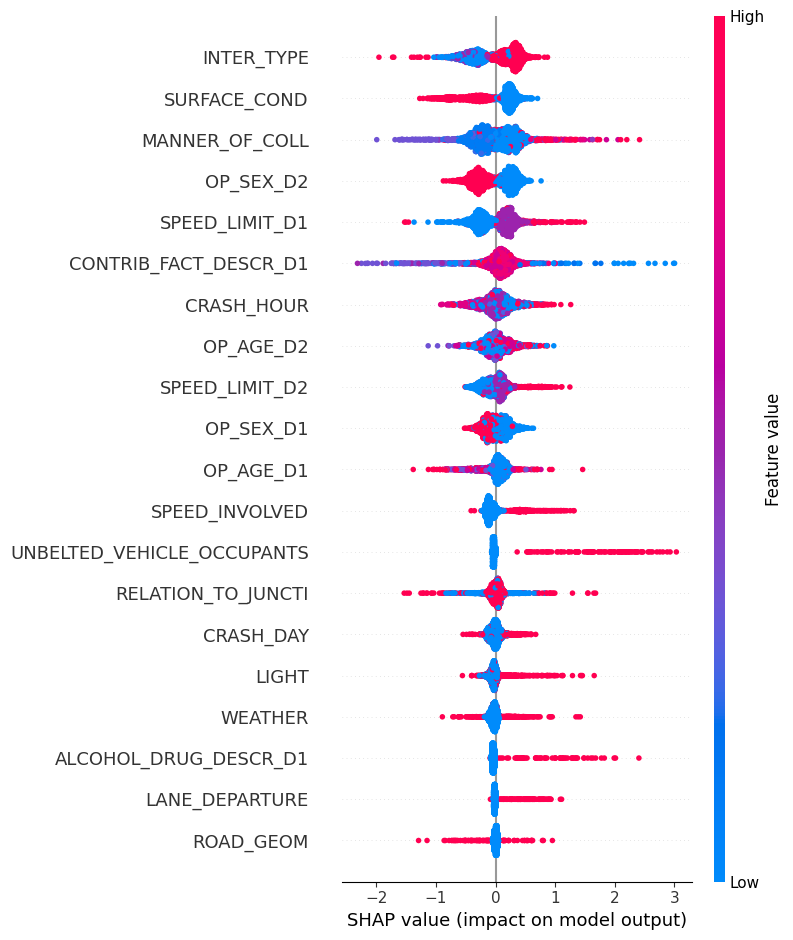


✅ Chi-Square Test Results: ['UNBELTED_VEHICLE_OCCUPANTS', 'SPEED_LIMIT_D1', 'SPEED_LIMIT_D2', 'ALCOHOL_DRUG_DESCR_D1', 'ALCOHOL_INVOLVED', 'INTER_TYPE', 'CRASH_DAY', 'CONTRIB_FACT_DESCR_D1', 'SURFACE_COND', 'OP_AGE_D1']

✅ RFE Selected Features: ['LIGHT', 'SURFACE_COND', 'INTER_TYPE', 'ROAD_GEOM', 'CRASH_DAY', 'ALCOHOL_INVOLVED', 'UNBELTED_VEHICLE_OCCUPANTS', 'ALCOHOL_DRUG_DESCR_D1', 'SPEED_LIMIT_D1', 'OP_SEX_D2']

✅ Permutation Importance Results: ['SURFACE_COND', 'OP_AGE_D2', 'CONTRIB_FACT_DESCR_D1', 'SPEED_LIMIT_D1', 'LIGHT', 'WEATHER', 'SPEED_LIMIT_D2', 'CRASH_DAY', 'UNBELTED_VEHICLE_OCCUPANTS', 'OP_SEX_D1']

✅ Lasso Selected Features: ['UNBELTED_VEHICLE_OCCUPANTS', 'ALCOHOL_DRUG_DESCR_D1', 'INTER_TYPE', 'SPEED_LIMIT_D1', 'LIGHT', 'SPEED_LIMIT_D2', 'CRASH_DAY', 'CONTRIB_FACT_DESCR_D1', 'ROAD_COND', 'ALCOHOL_INVOLVED']

✅ XGBoost Feature Importance: ['UNBELTED_VEHICLE_OCCUPANTS', 'ALCOHOL_DRUG_DESCR_D1', 'SPEED_LIMIT_D2', 'INTER_TYPE', 'SURFACE_COND', 'CRASH_DAY', 'CONTRIB_FACT_DES

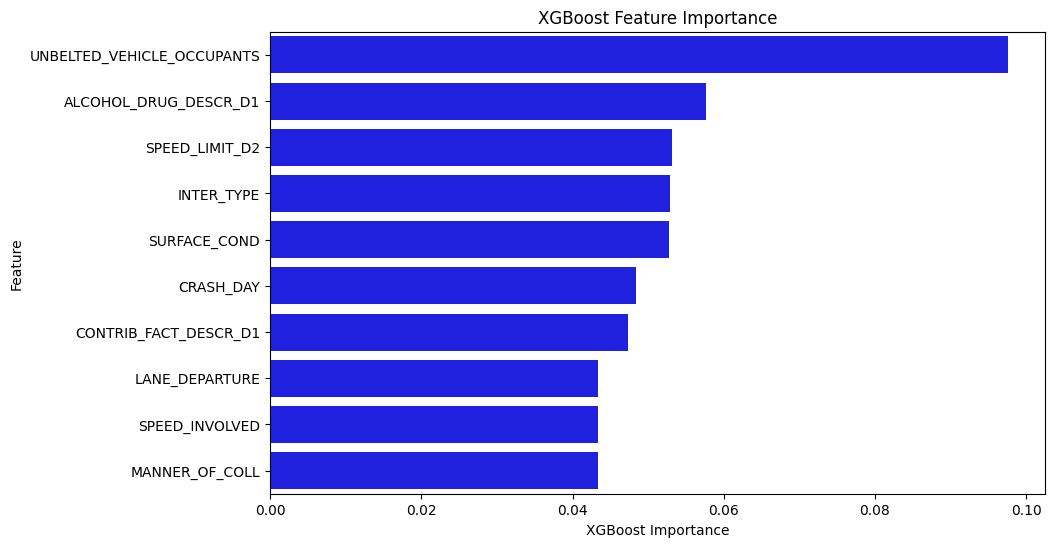

In [ ]:


# ✅ Chi-Square Test (Categorical Features)
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi2_selector.scores_})
chi2_scores = chi2_scores.sort_values(by='Chi-Square Score', ascending=False)


# ✅ Recursive Feature Elimination (RFE with Logistic Regression)
rfe_model = LogisticRegression(max_iter=5000, random_state=42)
rfe_selector = RFE(estimator=rfe_model, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)
rfe_scores = pd.DataFrame({'Feature': X.columns, 'RFE Selected': rfe_selector.support_})
rfe_selected_features = X.columns[rfe_selector.support_]

# ✅ Permutation Importance (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
perm_importance = permutation_importance(rf_model, X_test, y_test, random_state=42)
perm_scores = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': perm_importance.importances_mean})
perm_scores = perm_scores.sort_values(by='Permutation Importance', ascending=False)

# ✅ Lasso Feature Selection (L1 Regularization)
lasso_selector = LassoCV(cv=5, random_state=42)
lasso_selector.fit(X_train, y_train)
lasso_scores = pd.DataFrame({'Feature': X.columns, 'Lasso Coefficients': lasso_selector.coef_})
lasso_selected_features = lasso_scores[lasso_scores['Lasso Coefficients'] != 0].sort_values(by='Lasso Coefficients', ascending=False)

# ✅ SHAP Feature Importance
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# ✅ Gradient Boosting Feature Importance (XGBoost & LightGBM)
xgb_importance = pd.DataFrame({'Feature': X.columns, 'XGBoost Importance': xgb_model.feature_importances_})
xgb_importance = xgb_importance.sort_values(by='XGBoost Importance', ascending=False)


# 🚀 Print Feature Importance Scores
print("\n✅ Chi-Square Test Results:", list(chi2_scores.head(10)['Feature']))
print("\n✅ RFE Selected Features:", list(rfe_selected_features))
print("\n✅ Permutation Importance Results:", list(perm_scores.head(10)['Feature']))
print("\n✅ Lasso Selected Features:", list(lasso_selected_features.head(10)['Feature']))
print("\n✅ XGBoost Feature Importance:", list(xgb_importance.head(10)['Feature']))


# 🚀 Visualize Feature Importance from Tree-Based Models
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_importance.head(10), x="XGBoost Importance", y="Feature", color="blue")
plt.title("XGBoost Feature Importance")
plt.show()


# Stat Results

In [ ]:
# Define feature sets from each method
chi2_features = {'MANNER_OF_COLL', 'OP_AGE_D1', 'INTER_TYPE', 'CONTRIB_FACT_DESCR_D1',
                 'ALCOHOL_DRUG_DESCR_D1', 'LANE_DEPARTURE', 'UNBELTED_VEHICLE_OCCUPANTS',
                 'OP_AGE_D2', 'OP_SEX_D1', 'ALCOHOL_INVOLVED'}

rfe_features = {'LIGHT', 'INTER_TYPE', 'SPEED_INVOLVED', 'LANE_DEPARTURE', 'OP_SEX_D1',
                'ALCOHOL_DRUG_DESCR_D1', 'CONTRIB_FACT_DESCR_D1', 'SPEED_LIMIT_D1',
                'OP_SEX_D2', 'SPEED_LIMIT_D2'}

perm_features = {'CRASH_HOUR', 'CRASH_DAY', 'MANNER_OF_COLL', 'OP_SEX_D2', 'LIGHT',
                 'LANE_DEPARTURE', 'TRAFFIC_CONTROL_DESCR_V1', 'UNBELTED_VEHICLE_OCCUPANTS',
                 'SURFACE_COND', 'RELATION_TO_JUNCTI'}

# lasso_features = {'MANNER_OF_COLL', 'OP_AGE_D1', 'LIGHT', 'CONTRIB_FACT_DESCR_D1', 'INTER_TYPE'}

xgb_features = {'LANE_DEPARTURE', 'MANNER_OF_COLL', 'LIGHT', 'OP_AGE_D2', 'CRASH_DAY',
                'SPEED_LIMIT_D1', 'UNBELTED_VEHICLE_OCCUPANTS', 'RELATION_TO_JUNCTI',
                'SURFACE_COND', 'CONTRIB_FACT_DESCR_D1'}

# Find common features across all methods
common_features = perm_features & xgb_features

# Print the common features
print("✅ Common Features Across Methods:", list(common_features))


✅ Common Features Across Methods: ['UNBELTED_VEHICLE_OCCUPANTS', 'MANNER_OF_COLL', 'LANE_DEPARTURE', 'LIGHT', 'SURFACE_COND', 'RELATION_TO_JUNCTI', 'CRASH_DAY']


## Model Tryouts

### Chi-Sqr

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['MANNER_OF_COLL', 'OP_AGE_D1', 'INTER_TYPE', 'CONTRIB_FACT_DESCR_D1',
                     'ALCOHOL_DRUG_DESCR_D1', 'LANE_DEPARTURE', 'UNBELTED_VEHICLE_OCCUPANTS',
                     'OP_AGE_D2', 'OP_SEX_D1', 'ALCOHOL_INVOLVED','LATITUDE','LONGITUDE']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

# ✅ Encode categorical features
for col in selected_features:
    if df_filtered[col].dtype == 'object':
        df_filtered[col] = LabelEncoder().fit_transform(df_filtered[col])

# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.577708   0.578386  0.577708  0.576673
Random Forest        0.571429   0.571696  0.571429  0.570940
XGBoost              0.551020   0.551020  0.551020  0.550998
MLP                  0.577708   0.577711  0.577708  0.577708
KNN                  0.571429   0.572178  0.571429  0.570444


### RFE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['LIGHT', 'INTER_TYPE', 'SPEED_INVOLVED', 'LANE_DEPARTURE', 'OP_SEX_D1',
                'ALCOHOL_DRUG_DESCR_D1', 'CONTRIB_FACT_DESCR_D1', 'SPEED_LIMIT_D1',
                'OP_SEX_D2', 'SPEED_LIMIT_D2','LATITUDE','LONGITUDE']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

# ✅ Encode categorical features
for col in selected_features:
    if df_filtered[col].dtype == 'object':
        df_filtered[col] = LabelEncoder().fit_transform(df_filtered[col])

# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.604396   0.604404  0.604396  0.604376
Random Forest        0.563579   0.564083  0.563579  0.562577
XGBoost              0.574568   0.574590  0.574568  0.574510
MLP                  0.598116   0.598124  0.598116  0.598096
KNN                  0.536892   0.536894  0.536892  0.536828


### Permutation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['CRASH_HOUR', 'CRASH_DAY', 'MANNER_OF_COLL', 'OP_SEX_D2', 'LIGHT',
                 'LANE_DEPARTURE', 'TRAFFIC_CONTROL_DESCR_V1', 'UNBELTED_VEHICLE_OCCUPANTS',
                 'SURFACE_COND', 'RELATION_TO_JUNCTI','LATITUDE','LONGITUDE']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

# ✅ Encode categorical features
for col in selected_features:
    if df_filtered[col].dtype == 'object':
        df_filtered[col] = LabelEncoder().fit_transform(df_filtered[col])

# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.576138   0.576344  0.576138  0.575781
Random Forest        0.536892   0.536958  0.536892  0.536542
XGBoost              0.527473   0.527499  0.527473  0.527193
MLP                  0.557300   0.557526  0.557300  0.556747
KNN                  0.533752   0.533800  0.533752  0.533669


### Lasso

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['MANNER_OF_COLL', 'OP_AGE_D1', 'LIGHT', 'CONTRIB_FACT_DESCR_D1', 'INTER_TYPE','LATITUDE','LONGITUDE']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

# ✅ Encode categorical features
for col in selected_features:
    if df_filtered[col].dtype == 'object':
        df_filtered[col] = LabelEncoder().fit_transform(df_filtered[col])

# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.566719   0.567049  0.566719  0.566077
Random Forest        0.522763   0.522762  0.522763  0.522634
XGBoost              0.536892   0.537101  0.536892  0.536412
MLP                  0.565149   0.565152  0.565149  0.565149
KNN                  0.522763   0.522878  0.522763  0.522403


### XGB

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['LANE_DEPARTURE', 'MANNER_OF_COLL', 'LIGHT', 'OP_AGE_D2', 'CRASH_DAY',
                'SPEED_LIMIT_D1', 'UNBELTED_VEHICLE_OCCUPANTS', 'RELATION_TO_JUNCTI',
                'SURFACE_COND', 'CONTRIB_FACT_DESCR_D1','LATITUDE','LONGITUDE']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

# ✅ Encode categorical features
for col in selected_features:
    if df_filtered[col].dtype == 'object':
        df_filtered[col] = LabelEncoder().fit_transform(df_filtered[col])

# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.558870   0.559180  0.558870  0.558162
Random Forest        0.554160   0.554466  0.554160  0.553387
XGBoost              0.533752   0.533767  0.533752  0.533600
MLP                  0.580848   0.580846  0.580848  0.580846
KNN                  0.544741   0.544808  0.544741  0.544640


### Combined

In [ ]:
df['CRASH_SEVERITY'].value_counts()

,count
CRASH_SEVERITY,
1,1592
2,1592


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['UNBELTED_VEHICLE_OCCUPANTS', 'MANNER_OF_COLL', 'LANE_DEPARTURE', 'LIGHT', 'SURFACE_COND', 'RELATION_TO_JUNCTI', 'CRASH_DAY','LATITUDE','LONGITUDE']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

# ✅ Encode categorical features
for col in selected_features:
    if df_filtered[col].dtype == 'object':
        df_filtered[col] = LabelEncoder().fit_transform(df_filtered[col])

# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.540795   0.540946  0.540795  0.540372
Random Forest        0.512552   0.512584  0.512552  0.512245
XGBoost              0.548117   0.548219  0.548117  0.547878
MLP                  0.589958   0.590015  0.589958  0.589894
KNN                  0.552301   0.552309  0.552301  0.552284


In [ ]:
df['CRASH_SEVERITY'].value_counts()

,count
CRASH_SEVERITY,
2,551
3,551


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['UNBELTED_VEHICLE_OCCUPANTS', 'MANNER_OF_COLL', 'LANE_DEPARTURE', 'LIGHT', 'SURFACE_COND', 'RELATION_TO_JUNCTI', 'CRASH_DAY','LATITUDE','LONGITUDE']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

from category_encoders import TargetEncoder

# Apply Target Encoding
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X, y)


# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

## Tuned Models

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       924
           1       0.64      0.71      0.67       923

    accuracy                           0.66      1847
   macro avg       0.66      0.66      0.66      1847
weighted avg       0.66      0.66      0.66      1847



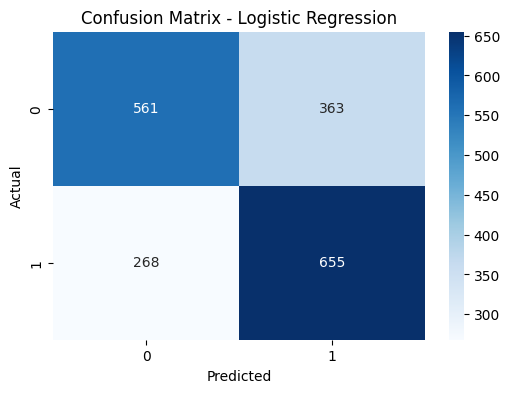

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Define hyperparameter grid
lr_params = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'lbfgs']
}

# Initialize model
lr = LogisticRegression(max_iter=5000, random_state=42)

# Perform Randomized Search CV
lr_search = RandomizedSearchCV(lr, lr_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
lr_search.fit(X_train, y_train)

# Best model
best_lr = lr_search.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)

# Evaluate
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       924
           1       0.80      0.72      0.76       923

    accuracy                           0.77      1847
   macro avg       0.77      0.77      0.77      1847
weighted avg       0.77      0.77      0.77      1847



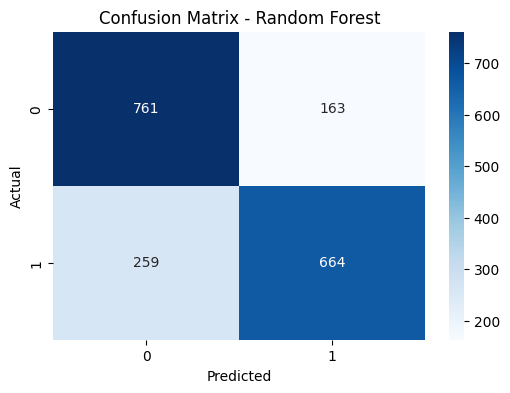

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
rf_params = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search CV
rf_search = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

# Best model
best_rf = rf_search.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


MLP Performance:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       924
           1       0.72      0.82      0.77       923

    accuracy                           0.75      1847
   macro avg       0.76      0.75      0.75      1847
weighted avg       0.76      0.75      0.75      1847



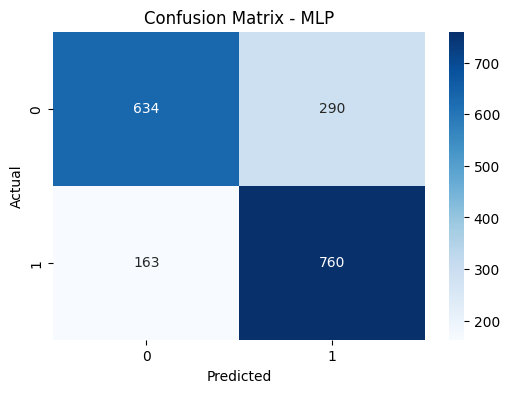

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define hyperparameter grid
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Initialize model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform Randomized Search CV
mlp_search = RandomizedSearchCV(mlp, mlp_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
mlp_search.fit(X_train, y_train)

# Best model
best_mlp = mlp_search.best_estimator_

# Predictions
y_pred_mlp = best_mlp.predict(X_test)

# Evaluate
print("MLP Performance:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP")
plt.show()


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       924
           1       0.76      0.62      0.68       923

    accuracy                           0.71      1847
   macro avg       0.72      0.71      0.71      1847
weighted avg       0.72      0.71      0.71      1847



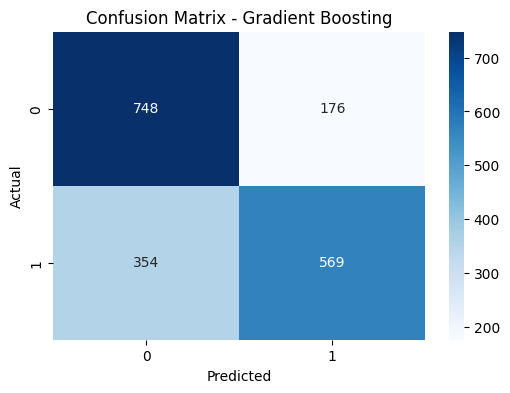

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameter grid
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Initialize model
gb = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search CV
gb_search = RandomizedSearchCV(gb, gb_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
gb_search.fit(X_train, y_train)

# Best model
best_gb = gb_search.best_estimator_

# Predictions
y_pred_gb = best_gb.predict(X_test)

# Evaluate
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define hyperparameter grid
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize model
adaboost = AdaBoostClassifier(random_state=42)

# Perform Randomized Search CV
adaboost_search = RandomizedSearchCV(adaboost, adaboost_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
adaboost_search.fit(X_train, y_train)

# Best model
best_adaboost = adaboost_search.best_estimator_

# Predictions
y_pred_adaboost = best_adaboost.predict(X_test)

# Evaluate
print("AdaBoost Performance:")
print(classification_report(y_test, y_pred_adaboost))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


KNN Performance:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       924
           1       0.74      0.89      0.80       923

    accuracy                           0.78      1847
   macro avg       0.80      0.78      0.78      1847
weighted avg       0.80      0.78      0.78      1847



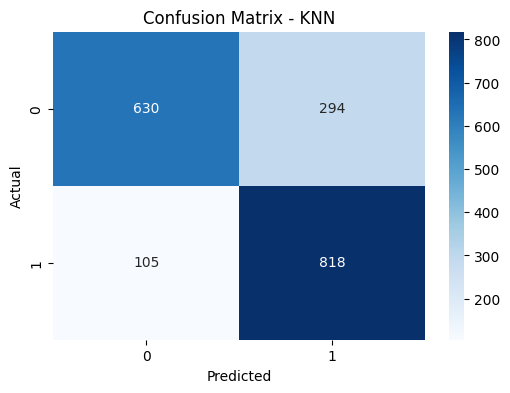

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid
knn_params = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize model
knn = KNeighborsClassifier()

# Perform Randomized Search CV
knn_search = RandomizedSearchCV(knn, knn_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
knn_search.fit(X_train, y_train)

# Best model
best_knn = knn_search.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Evaluate
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


## Hybrid

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

class BinaryStackingClassifierExperiment:
    def __init__(self, trained_models, meta_models, random_state=42, verbose=False):
        """
        Initialize the stacking experiment with pre-trained base and meta models.

        Parameters:
        -----------
        trained_models : dict
            A dictionary of pre-trained base models {model_name: model_instance}.
        meta_models : dict
            A dictionary of meta models to test {model_name: model_instance}.
        random_state : int
            Random state for reproducibility.
        verbose : bool
            If True, print details during the experiment.
        """
        self.trained_models = trained_models
        self.meta_models = meta_models
        self.random_state = random_state
        self.verbose = verbose
        self.results = []

    def _get_base_predictions(self, X, selected_models):
        """Use pre-trained models to get base predictions"""
        predictions = np.zeros((X.shape[0], len(selected_models)))

        for i, (name, model) in enumerate(selected_models.items()):
            if self.verbose:
                print(f"Generating predictions using {name}...")
            predictions[:, i] = model.predict_proba(X)[:, 1]  # Use probability of class 1

        return predictions

    def run_experiment(self, X_train, y_train, X_test, y_test, min_models=1, max_models=None):
        """
        Run experiments with different combinations of base and meta models.

        Parameters:
        -----------
        X_train, y_train : array-like
            Training features and labels (binary: 0 or 1).
        X_test, y_test : array-like
            Test features and labels (binary: 0 or 1).
        min_models : int, default=1
            Minimum number of base models to use in combinations.
        max_models : int, default=None
            Maximum number of base models to use in combinations.
        """
        X_train, X_test = np.array(X_train), np.array(X_test)
        y_train, y_test = np.array(y_train), np.array(y_test)

        # Set max_models to total number of trained models if not specified
        if max_models is None or max_models > len(self.trained_models):
            max_models = len(self.trained_models)

        # Try different numbers of base models
        for n_models in range(min_models, max_models + 1):
            if self.verbose:
                print(f"\nTrying combinations with {n_models} base models...")

            # Try different combinations of base models
            for base_models_combo in combinations(self.trained_models.items(), n_models):
                selected_base_models = dict(base_models_combo)

                # Get meta features from pre-trained models
                meta_features_train = self._get_base_predictions(X_train, selected_base_models)
                meta_features_test = self._get_base_predictions(X_test, selected_base_models)

                # Try each meta model
                for meta_name, meta_model in self.meta_models.items():
                    if self.verbose:
                        print(f"\nTesting combination: {list(selected_base_models.keys())} with meta model: {meta_name}")

                    # Fit meta model on training meta-features
                    meta_model.fit(meta_features_train, y_train)

                    # Generate predictions
                    y_pred = meta_model.predict(meta_features_test)
                    y_pred_proba = meta_model.predict_proba(meta_features_test)[:, 1]

                    # Compute evaluation metrics
                    accuracy = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)
                    roc_auc = roc_auc_score(y_test, y_pred_proba)

                    # Get detailed classification report
                    class_report = classification_report(y_test, y_pred, output_dict=True)

                    # Store results
                    self.results.append({
                        'base_models': list(selected_base_models.keys()),
                        'n_base_models': len(selected_base_models),
                        'meta_model': meta_name,
                        'accuracy': accuracy,
                        'f1_score': f1,
                        'roc_auc': roc_auc,
                        'class_report': class_report
                    })

        return self.get_results()

    def get_results(self):
        """Return results as a pandas DataFrame"""
        df_results = pd.DataFrame(self.results)
        df_results = df_results.sort_values(['accuracy', 'f1_score'], ascending=[False, False])
        return df_results

    def plot_top_results(self, top_n=5):
        """Plot performance comparison of top N combinations"""
        df_results = self.get_results().head(top_n)

        plt.figure(figsize=(15, 10))

        # Accuracy and F1-score comparison
        plt.subplot(211)
        x = np.arange(top_n)
        width = 0.35

        plt.bar(x - width/2, df_results['accuracy'], width, label='Accuracy')
        plt.bar(x + width/2, df_results['f1_score'], width, label='F1-score')

        plt.xlabel('Model Combination')
        plt.ylabel('Score')
        plt.title('Top Model Combinations - Accuracy & F1-score')
        plt.xticks(x, [f"Combo {i+1}" for i in range(top_n)], rotation=45)
        plt.legend()

        # ROC AUC comparison
        plt.subplot(212)
        bars = plt.bar(range(top_n), df_results['roc_auc'])
        plt.xlabel('Model Combination')
        plt.ylabel('ROC AUC')
        plt.title('Top Model Combinations - ROC AUC')
        plt.xticks(range(top_n), [f"Combo {i+1}" for i in range(top_n)], rotation=45)

        # Add labels for model combinations
        for i, row in df_results.iterrows():
            plt.text(i, 0.1,
                    f"Base: {', '.join(row['base_models'])}\nMeta: {row['meta_model']}",
                    ha='center', va='bottom', rotation=90)

        plt.tight_layout()
        plt.show()

    def print_detailed_results(self, top_n=3):
        """Print detailed classification results for top N combinations"""
        df_results = self.get_results().head(top_n)

        for i, row in df_results.iterrows():
            print(f"\nCombination {i+1}")
            print("=" * 50)
            print(f"Base Models: {', '.join(row['base_models'])}")
            print(f"Meta Model: {row['meta_model']}")
            print(f"Accuracy: {row['accuracy']:.4f}")
            print(f"F1-score: {row['f1_score']:.4f}")
            print(f"ROC AUC: {row['roc_auc']:.4f}")
            print("\nDetailed Classification Report:")
            report = pd.DataFrame(row['class_report']).transpose()
            print(report)
            print("\n")



Trying combinations with 1 base models...
Generating predictions using logistic...
Generating predictions using logistic...

Testing combination: ['logistic'] with meta model: logistic

Testing combination: ['logistic'] with meta model: knn
Generating predictions using random_forest...
Generating predictions using random_forest...

Testing combination: ['random_forest'] with meta model: logistic

Testing combination: ['random_forest'] with meta model: knn
Generating predictions using gradient_boosting...
Generating predictions using gradient_boosting...

Testing combination: ['gradient_boosting'] with meta model: logistic

Testing combination: ['gradient_boosting'] with meta model: knn
Generating predictions using adaboost...
Generating predictions using adaboost...

Testing combination: ['adaboost'] with meta model: logistic

Testing combination: ['adaboost'] with meta model: knn
Generating predictions using knn...
Generating predictions using knn...

Testing combination: ['knn'] wit

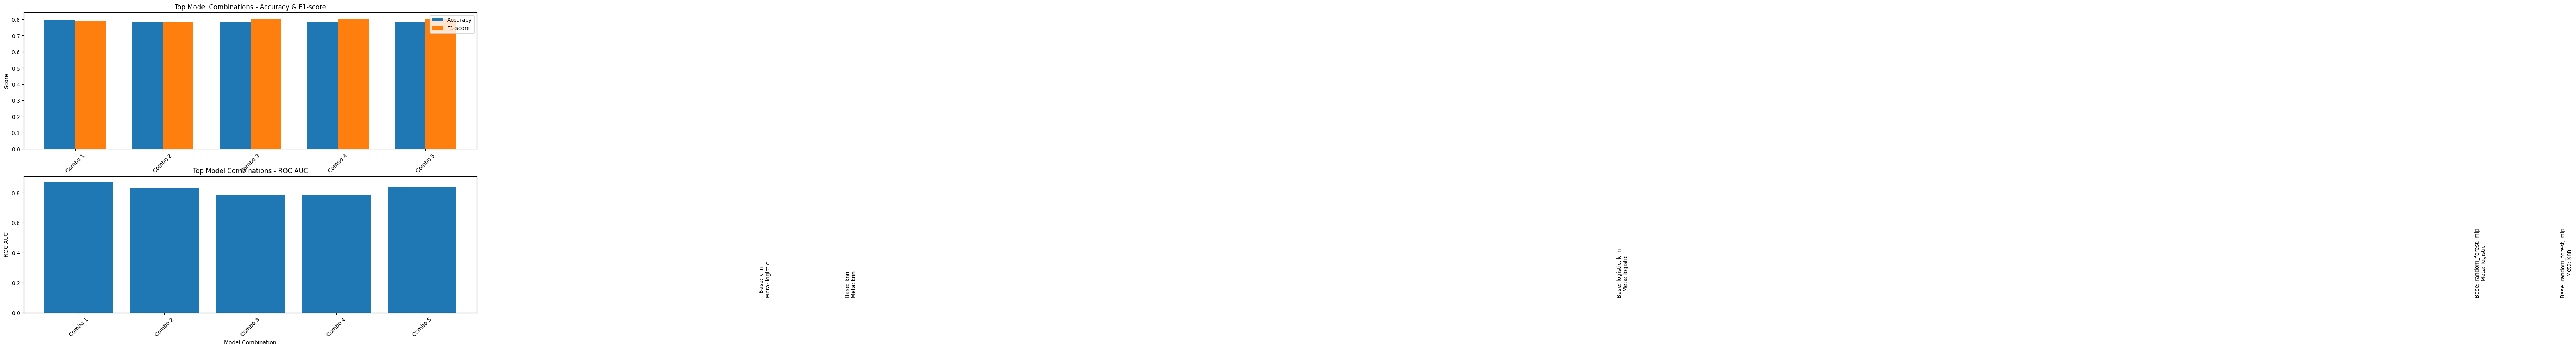

In [ ]:
# Assume you have already trained these models
trained_models = {
    'logistic': best_lr,
    'random_forest': best_rf,
    'gradient_boosting': best_gb,
    'adaboost': best_adaboost,
    'knn': best_knn,
    'mlp': best_mlp
}

# Define meta models
meta_models = {
    'logistic': LogisticRegression(max_iter=5000, random_state=42),
    'knn': KNeighborsClassifier(n_neighbors=5)
}

# Initialize the experiment with pre-trained models
experiment = BinaryStackingClassifierExperiment(trained_models, meta_models, verbose=True)

# Run the stacking experiment without retraining base models
results_df = experiment.run_experiment(X_train, y_train, X_test, y_test, min_models=1, max_models=2)

# Display results using Pandas
print("\nStacking Experiment Results:\n")
print(results_df.head())  # Show top results

# Save results as CSV (optional)
results_df.to_csv("stacking_experiment_results.csv", index=False)

# Plot performance comparison
experiment.plot_top_results(top_n=5)

# Print detailed results
experiment.print_detailed_results(top_n=3)


# Column ine by one

In [ ]:
df.columns

Index(['COUNTY', 'LIGHT', 'WEATHER', 'ROAD_COND', 'SURFACE_COND',
       'RELATION_TO_JUNCTI', 'INTER_TYPE', 'MANNER_OF_COLL', 'ROAD_GEOM',
       'LATITUDE', 'LONGITUDE', 'CRASH_DAY', 'YOUNG_DRIVER_UNDER_21',
       'SPEED_INVOLVED', 'ALCOHOL_INVOLVED', 'LANE_DEPARTURE',
       'UNBELTED_VEHICLE_OCCUPANTS', 'TRAFFIC_CONTROL_DESCR_V1', 'OP_AGE_D1',
       'OP_SEX_D1', 'ALCOHOL_DRUG_DESCR_D1', 'CONTRIB_FACT_DESCR_D1',
       'SPEED_LIMIT_D1', 'OP_AGE_D2', 'OP_SEX_D2', 'SPEED_LIMIT_D2',
       'CRASH_HOUR', 'CRASH_SEVERITY'],
      dtype='object')

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Selected Features
selected_features = ['CRASH_HOUR','LIGHT', 'WEATHER','LATITUDE', 'LONGITUDE', 'CRASH_DAY','CONTRIB_FACT_DESCR_D1']

# ✅ Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

from category_encoders import TargetEncoder

# Apply Target Encoding
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X, y)


# ✅ Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.547881   0.548026  0.547881  0.547412
Random Forest        0.516484   0.516484  0.516484  0.516484
XGBoost              0.544741   0.544763  0.544741  0.544618
MLP                  0.558870   0.558868  0.558870  0.558857
KNN                  0.560440   0.560635  0.560440  0.559984


# Autoencoder

In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For demonstration, we use your existing code references:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df.columns

Index(['COUNTY', 'LIGHT', 'WEATHER', 'ROAD_COND', 'SURFACE_COND',
       'RELATION_TO_JUNCTI', 'INTER_TYPE', 'MANNER_OF_COLL', 'ROAD_GEOM',
       'LATITUDE', 'LONGITUDE', 'CRASH_DAY', 'YOUNG_DRIVER_UNDER_21',
       'SPEED_INVOLVED', 'ALCOHOL_INVOLVED', 'LANE_DEPARTURE',
       'UNBELTED_VEHICLE_OCCUPANTS', 'TRAFFIC_CONTROL_DESCR_V1', 'OP_AGE_D1',
       'OP_SEX_D1', 'ALCOHOL_DRUG_DESCR_D1', 'CONTRIB_FACT_DESCR_D1',
       'SPEED_LIMIT_D1', 'OP_AGE_D2', 'OP_SEX_D2', 'SPEED_LIMIT_D2',
       'CRASH_HOUR', 'CRASH_SEVERITY'],
      dtype='object')

In [ ]:
# ✅ Selected Features
selected_features = ['CRASH_HOUR','MANNER_OF_COLL','LIGHT', 'WEATHER','LATITUDE', 'LONGITUDE', 'CRASH_DAY','CONTRIB_FACT_DESCR_D1','ALCOHOL_DRUG_DESCR_D1','OP_AGE_D1','OP_AGE_D2']

# Keep only selected features + target
df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()

# Encode target variable
y = LabelEncoder().fit_transform(df_filtered['CRASH_SEVERITY'])
X = df_filtered.drop(columns=['CRASH_SEVERITY'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# --------------------------------------------------------
# 1) Define Autoencoder Architecture
# --------------------------------------------------------
input_dim = X_train.shape[1]   # e.g. 7 features
encoded_dim = 14               # Over-complete dimension: bigger than 7
hidden_dim = 16                # Optional hidden layer dimension (tune as needed)

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder: You can add more layers if you wish
encoder_hidden = Dense(hidden_dim, activation='relu')(input_layer)
encoder_output = Dense(encoded_dim, activation='relu')(encoder_hidden)

# Decoder tries to reconstruct the original input_dim
decoder_hidden = Dense(hidden_dim, activation='relu')(encoder_output)
decoder_output = Dense(input_dim, activation='linear')(decoder_hidden)

# Autoencoder model: from input to output
autoencoder = Model(inputs=input_layer, outputs=decoder_output)

# If you want the 'encoder' part separately:
encoder = Model(inputs=input_layer, outputs=encoder_output)


In [ ]:
# --------------------------------------------------------
# 3) Create the "Encoded" Representations
# --------------------------------------------------------
X_train_encoded = encoder.predict(X_train)  # shape: (num_train_samples, encoded_dim)
X_test_encoded = encoder.predict(X_test)

# --------------------------------------------------------
# 4) Concatenate Original + Encoded
# --------------------------------------------------------
X_train_aug = np.concatenate([X_train, X_train_encoded], axis=1)
X_test_aug = np.concatenate([X_test, X_test_encoded], axis=1)

print("Original X_train shape:", X_train.shape)
print("Augmented X_train shape:", X_train_aug.shape)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Original X_train shape: (2547, 11)
Augmented X_train shape: (2547, 25)


In [ ]:
# Example: RandomForest on augmented features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_aug, y_train)

y_pred = clf.predict(X_test_aug)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("RandomForest on Autoencoder-Augmented Features:")
print(f"  Accuracy: {acc:.4f}")
print(f"  Precision (macro): {prec:.4f}")
print(f"  Recall (macro): {rec:.4f}")
print(f"  F1-score (macro): {f1:.4f}")


RandomForest on Autoencoder-Augmented Features:
  Accuracy: 0.5526
  Precision (macro): 0.5526
  Recall (macro): 0.5526
  F1-score (macro): 0.5526


## ANN

In [ ]:
pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
!pip install tensorflow==2.13.0
!pip install keras==2.13.1
!pip install tensorflow-addons==0.21.0

In [ ]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

## OverSampling SMOTE

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataset and 'CRASH_SEVERITY' is the target variable
X = df.drop(columns=['CRASH_SEVERITY'])  # Features
y = df['CRASH_SEVERITY']  # Target variable

# Splitting before oversampling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame for better interpretability
balanced_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
balanced_df['CRASH_SEVERITY'] = y_train_resampled

# Verify the new class distribution
print(balanced_df['CRASH_SEVERITY'].value_counts())

# Check the shape of the balanced dataset
balanced_df.shape


CRASH_SEVERITY
0    4617
1    4617
Name: count, dtype: int64


(9234, 28)

In [ ]:
df = balanced_df.copy()

In [ ]:
df.head()

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,LATITUDE,...,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR,CRASH_SEVERITY
0,9,1,1,1,1.0,1,1,2,1,46.890549,...,0,1,0,0,1,2,0,1,2,0
1,9,1,1,1,2.0,2,3,1,1,46.897586,...,0,0,0,7,0,2,1,0,3,0
2,31,1,1,1,1.0,2,3,1,1,47.992302,...,0,1,0,6,1,2,1,1,2,0
3,9,1,1,1,1.0,2,1,1,1,46.843658,...,1,0,0,6,0,0,0,1,4,0
4,18,1,1,1,1.0,1,1,1,1,47.924302,...,0,1,0,6,0,0,1,0,2,0


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
# from sklearn.preprocessing import LabelEncoder
# # Assuming 'df' is your dataset and 'CRASH_SEVERITY' is the target variable
# # ✅ Selected Features
# selected_features = ['MANNER_OF_COLL', 'OP_AGE_D1', 'INTER_TYPE', 'CONTRIB_FACT_DESCR_D1',
#                      'ALCOHOL_DRUG_DESCR_D1', 'LANE_DEPARTURE', 'UNBELTED_VEHICLE_OCCUPANTS',
#                      'OP_AGE_D2', 'OP_SEX_D1', 'ALCOHOL_INVOLVED','LATITUDE','LONGITUDE']

# # ✅ Keep only selected features + target
# df_filtered = df[selected_features + ['CRASH_SEVERITY']].copy()
# X = df_filtered.drop(columns=['CRASH_SEVERITY'])
# y = df_filtered['CRASH_SEVERITY']


In [ ]:
X = df.drop(columns=['CRASH_SEVERITY'])
y = df['CRASH_SEVERITY']

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Convert class labels to start from 0
X_train = X_train - X_train.min()
X_test = X_test - X_test.min()
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
CRASH_SEVERITY,
1,3694
0,3693


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

# Define ANN model for multiclass classification
def ANN(X_train, y_train, X_test, y_test, num_classes, loss='categorical_crossentropy', weights=None):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=X_train.shape[1], activation='relu'),  # Adjust input size dynamically
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')  # Multiclass output layer
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds


In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=X_train.shape[1], activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=200)
    else:
        model.fit(X_train, y_train, epochs=200, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
y_test

,CRASH_SEVERITY
4070,0
6338,1
1081,0
7304,1
9058,1
...,...
4252,0
1094,0
700,0
8174,1


In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/200
231/231 [==============================] - 2s 3ms/step - loss: 0.8188 - accuracy: 0.5468
Epoch 2/200
231/231 [==============================] - 1s 3ms/step - loss: 0.6445 - accuracy: 0.6288
Epoch 3/200
231/231 [==============================] - 1s 3ms/step - loss: 0.6312 - accuracy: 0.6433
Epoch 4/200
231/231 [==============================] - 1s 3ms/step - loss: 0.6223 - accuracy: 0.6567
Epoch 5/200
231/231 [==============================] - 1s 2ms/step - loss: 0.6169 - accuracy: 0.6614
Epoch 6/200
231/231 [==============================] - 1s 3ms/step - loss: 0.6126 - accuracy: 0.6643
Epoch 7/200
231/231 [==============================] - 1s 2ms/step - loss: 0.6105 - accuracy: 0.6743
Epoch 8/200
231/231 [==============================] - 1s 3ms/step - loss: 0.6094 - accuracy: 0.6693
Epoch 9/200
231/231 [==============================] - 1s 4ms/step - loss: 0.6085 - accuracy: 0.6728
Epoch 10/200
231/231 [==============================] - 1s 4ms/step - loss: 0.6051 - accura

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# ✅ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ✅ Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# ✅ Convert results to DataFrame and display
results_df = pd.DataFrame(results).transpose()
print("\n✅ Model Performance Metrics:")
print(results_df)



✅ Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.658906   0.660661  0.658906  0.657992
Random Forest        0.794261   0.796706  0.794261  0.793829
XGBoost              0.711965   0.714363  0.711965  0.711144
MLP                  0.738495   0.739020  0.738495  0.738356
KNN                  0.738495   0.761005  0.738495  0.732763
